In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('Hatecrimes.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Motiv          17 non-null     object
 1   Underkategori  17 non-null     object
 2   2017           17 non-null     int64 
 3   2018           17 non-null     int64 
 4   2019           17 non-null     int64 
 5   2020           17 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 944.0+ bytes


In [4]:
motiv = df[df['Underkategori'] == 'I alt'].drop(columns = 'Underkategori')
motiv

,Motiv,2017,2018,2019,2020
3,Racistisk motiveret,223,260,312,360
10,Religiøst motiveret,142,112,180,194
14,Seksuelt orienteret,81,74,76,79
15,Ikke muligt at specificere motiv,0,3,1,2
16,Alle motivkategorier,446,449,569,635


In [43]:
test = pd.melt(df, id_vars=['Motiv'], value_vars=['2017', '2018', '2019', '2020'])
test = test[test['Motiv'] != 'Alle motivkategorier']
test = test.rename({'variable': 'År', 'value': 'Antal'}, axis=1)
test['År'] = test['År'].astype(str).astype(int)
test['Motiv'] = test['Motiv'].astype(str)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 66
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motiv   64 non-null     object
 1   År      64 non-null     int32 
 2   Antal   64 non-null     int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 1.8+ KB


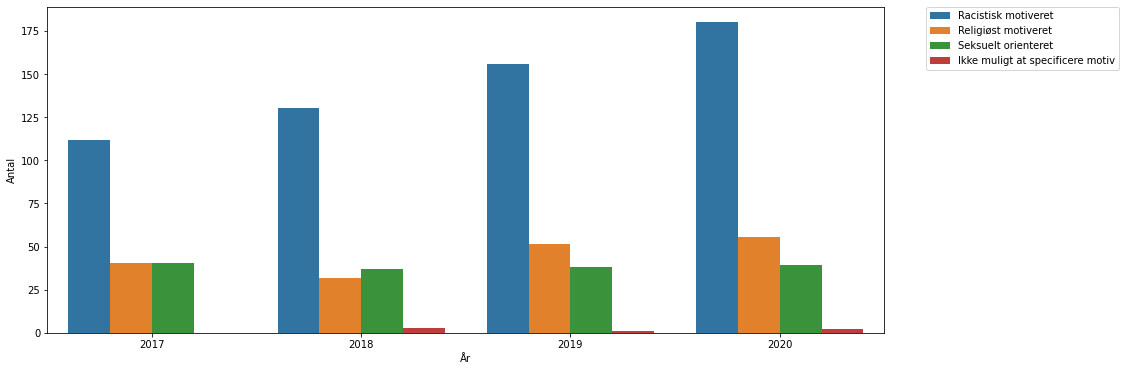

In [51]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x="År", y="Antal", hue="Motiv", data=test, ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

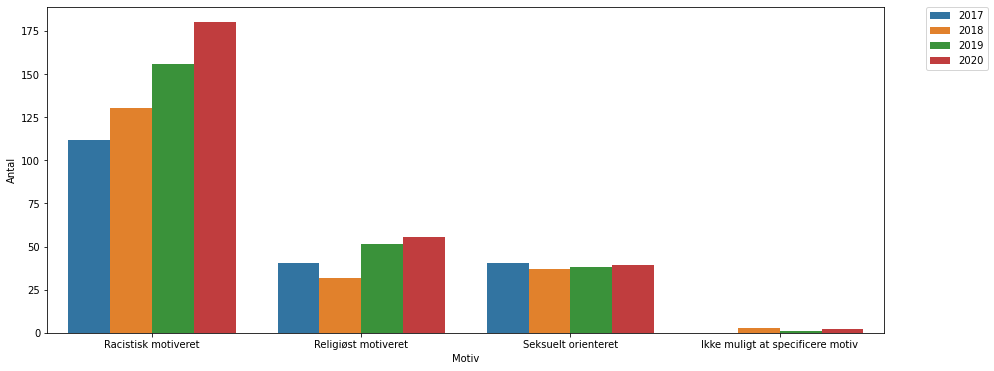

In [45]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x="Motiv", y="Antal", hue="År", data=test, ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

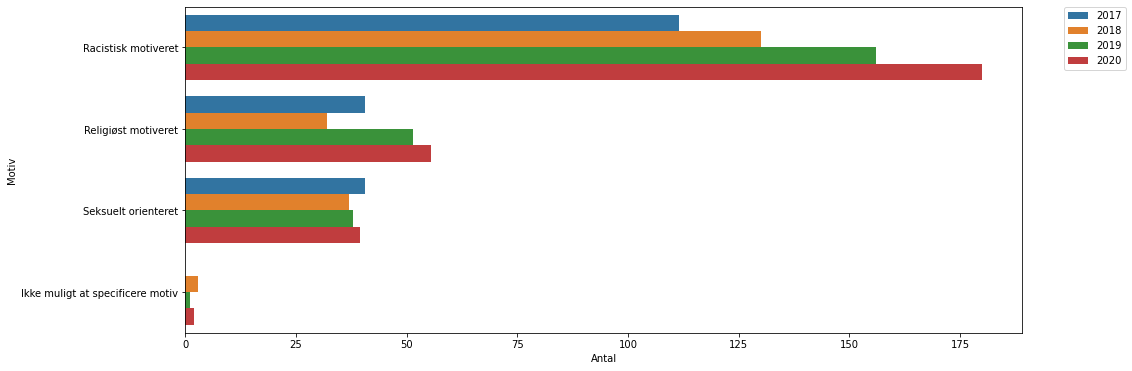

In [53]:
plt.figure(figsize=(15,6))
ax = sns.barplot(y="Motiv", x="Antal", hue="År", data=test, ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Bar chart race test

In [ ]:
race = df[(df['Underkategori'] != 'I alt') & (df['Motiv'] != 'Alle motivkategorier')]
race_group = race.groupby('Motiv').sum()
data = race_group
data

In [ ]:
df = data.stack().reset_index()
df = df.pivot(index='level_1', columns='Motiv', values=0)

In [ ]:
import bar_chart_race as bcr
bcr.bar_chart_race(df = df, 
                   n_bars = 4, 
                   sort='desc',
                   title='Hatecrimes in dk',
                   filename = 'hate.mp4')